In [1]:
import fastai
from fastai.vision import *
import numpy as np

In [2]:
path = ('../input/animals')
print(path)
for folder in ('ants','cats','dogs','lions','spiders'):
    print(folder)
# verify_images(os.path.join(path,folder), delete=True, max_size=500)

../input/animals
ants
cats
dogs
lions
spiders


OSError: [Errno 30] Read-only file system: '../input/animals/spiders'

In [3]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.2, ds_tfms=get_transforms(),
                                 size=224, num_workers=0).normalize(imagenet_stats)

In [4]:
data.classes

['ants', 'cats', 'dogs', 'lions', 'spiders']

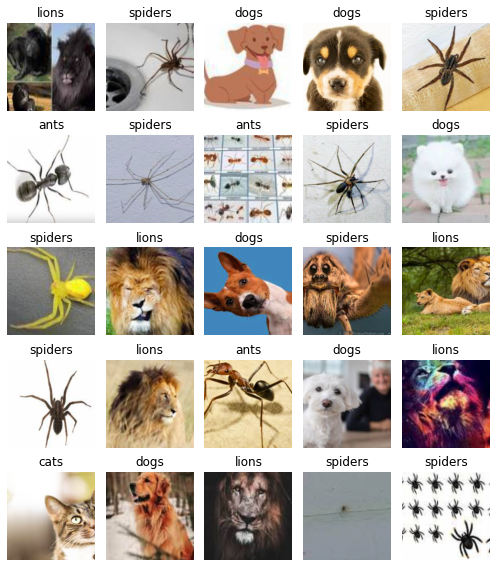

In [5]:
data.show_batch(figsize=(7, 8))

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [7]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.915551,2.543196,0.771429,00:28
1,2.160204,1.046010,0.342857,00:25
2,1.577334,0.961576,0.257143,00:25
3,1.200011,0.954097,0.228571,00:24
4,0.964740,0.932536,0.228571,00:24


In [8]:
learn.unfreeze()

In [ ]:
# learn.recorder.plot()

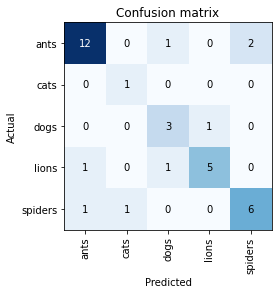

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

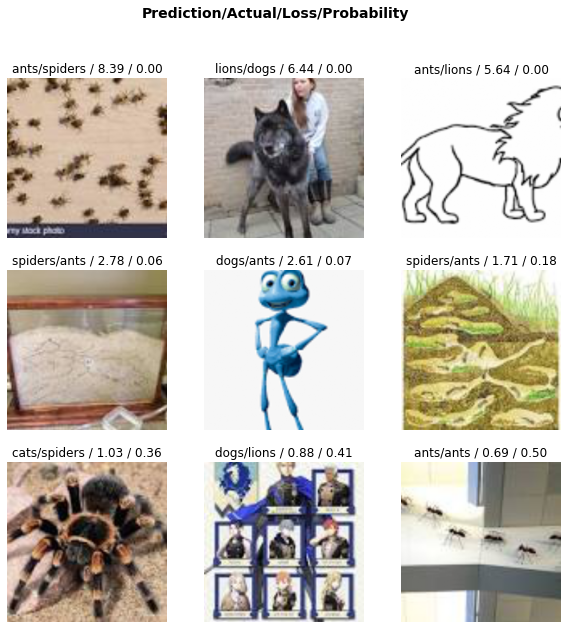

In [10]:
interp.plot_top_losses(9, figsize=(10,10))